ЛАБОРАТОРНА РОБОТА 3. Машинне навчання.
Тема: Лінійна регресія.

In [ ]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import pandas as pd

Завдання 1.

1. Вивести перших 5 рядків.

In [ ]:
from sklearn.datasets import load_diabetes
diabetes_data = load_diabetes(as_frame=True)
df = diabetes_data.frame

In [ ]:
print(df.head())

        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  target  
0 -0.002592  0.019907 -0.017646   151.0  
1 -0.039493 -0.068332 -0.092204    75.0  
2 -0.002592  0.002861 -0.025930   141.0  
3  0.034309  0.022688 -0.009362   206.0  
4 -0.002592 -0.031988 -0.046641   135.0  


2. Перевірити наявність пропусків. У разі виявлення замінити на середнє значення.

In [ ]:
missing_values = df.isnull().sum()
print("Пропуски у даних:\n", missing_values)
df.fillna(df.mean(), inplace=True)

Пропуски у даних:
 age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64


3. Перевірити наявність дублікатів, при виявленні – видалити.

In [ ]:
duplicates = df.duplicated().sum()
print(f"Кількість дублікатів: {duplicates}")
df.drop_duplicates(inplace=True)

Кількість дублікатів: 0


4. Замінити бінарні ознаки. У стовпчику «sex» спочатку перевірте унікальні значення.

In [ ]:
# Заміна бінарних ознак у стовпчику 'sex'
unique_values = df['sex'].unique()
print("Unique values in the 'sex' column:", unique_values)

Unique values in the 'sex' column: [ 0.05068012 -0.04464164]


In [ ]:
# Створення нового стовпчика 'gender' з категоріями
df['gender'] = df['sex'].apply(lambda x: "0" if x > 0 else "1")

# Видалення старого стовпчика 'sex'
df.drop('sex', axis=1, inplace=True)

# Перевірка результату
# print(df[['gender']].head())
print(df.head())

        age       bmi        bp        s1        s2        s3        s4  \
0  0.038076  0.061696  0.021872 -0.044223 -0.034821 -0.043401 -0.002592   
1 -0.001882 -0.051474 -0.026328 -0.008449 -0.019163  0.074412 -0.039493   
2  0.085299  0.044451 -0.005670 -0.045599 -0.034194 -0.032356 -0.002592   
3 -0.089063 -0.011595 -0.036656  0.012191  0.024991 -0.036038  0.034309   
4  0.005383 -0.036385  0.021872  0.003935  0.015596  0.008142 -0.002592   

         s5        s6  target gender  
0  0.019907 -0.017646   151.0      0  
1 -0.068332 -0.092204    75.0      1  
2  0.002861 -0.025930   141.0      0  
3  0.022688 -0.009362   206.0      1  
4 -0.031988 -0.046641   135.0      1  


In [ ]:
df['sex'] = df['gender'].replace({'female': 1, 'male': 0}).astype(int)

df.drop('gender', axis=1, inplace=True)

print(df.head())

        age       bmi        bp        s1        s2        s3        s4  \
0  0.038076  0.061696  0.021872 -0.044223 -0.034821 -0.043401 -0.002592   
1 -0.001882 -0.051474 -0.026328 -0.008449 -0.019163  0.074412 -0.039493   
2  0.085299  0.044451 -0.005670 -0.045599 -0.034194 -0.032356 -0.002592   
3 -0.089063 -0.011595 -0.036656  0.012191  0.024991 -0.036038  0.034309   
4  0.005383 -0.036385  0.021872  0.003935  0.015596  0.008142 -0.002592   

         s5        s6  target  sex  
0  0.019907 -0.017646   151.0    0  
1 -0.068332 -0.092204    75.0    1  
2  0.002861 -0.025930   141.0    0  
3  0.022688 -0.009362   206.0    1  
4 -0.031988 -0.046641   135.0    1  


5. Перевірити тип даних. При необхідності замінити тип даних на числовий.

In [ ]:
print("Типи даних:\n", df.dtypes)

Типи даних:
 age       float64
bmi       float64
bp        float64
s1        float64
s2        float64
s3        float64
s4        float64
s5        float64
s6        float64
target    float64
sex         int64
dtype: object


6. Обчислити кореляцію між прогресом діабету і іншмим ознаками. Розташувати в порядку спадання.
Побудувати теплову карту кореляції.


In [ ]:
correlation_with_target = df.corr()['target'].drop('target')

# Sort the correlations in descending order
correlation_sorted = correlation_with_target.sort_values(ascending=False)

# Display the sorted correlations
print(correlation_sorted)

bmi    0.586450
s5     0.565883
bp     0.441482
s4     0.430453
s6     0.382483
s1     0.212022
age    0.187889
s2     0.174054
sex   -0.043062
s3    -0.394789
Name: target, dtype: float64


7. Масштабувати ознаки.

In [ ]:
features = df.drop('target', axis=1)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
df_scaled = pd.DataFrame(scaled_features, columns=features.columns)


8. Поділити дані на тренувальну і тестову вибірки.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_scaled, df['target'], test_size=0.2, random_state=42)


9. Побудувати модель лінійной регресії і RandomForest регресії на основі більш корелюючих ознак (підібрати оптимальне число).

In [ ]:
# Лінійна регресія
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

# RandomForest регресія
forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
forest_model.fit(X_train, y_train)
y_pred_forest = forest_model.predict(X_test)


10. Вивести коефіцієнт детермінації і середньоквадратичну помилку.

In [ ]:
r2_linear = r2_score(y_test, y_pred_linear)
mse_linear = mean_squared_error(y_test, y_pred_linear)

r2_forest = r2_score(y_test, y_pred_forest)
mse_forest = mean_squared_error(y_test, y_pred_forest)

print(f"Лінійна регресія: R2 = {r2_linear:.2f}, MSE = {mse_linear:.2f}")
print(f"RandomForest регресія: R2 = {r2_forest:.2f}, MSE = {mse_forest:.2f}")


Лінійна регресія: R2 = 0.45, MSE = 2900.19
RandomForest регресія: R2 = 0.44, MSE = 2990.69


11. Побудувати графіки.

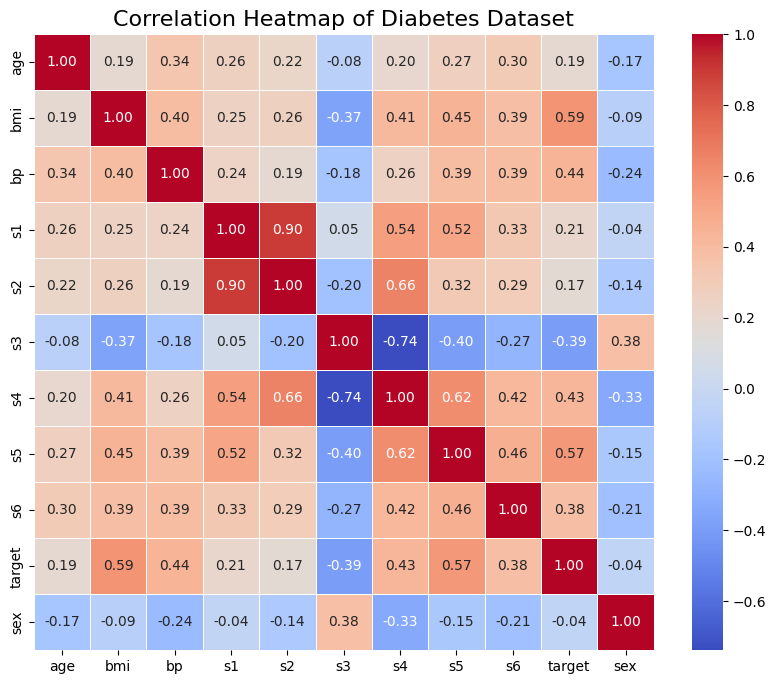

In [ ]:

import seaborn as sns
import matplotlib.pyplot as plt


correlation_with_target = df.corr()
plt.figure(figsize=(10, 8))

# Create a heatmap
sns.heatmap(correlation_with_target, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Set the title
plt.title('Correlation Heatmap of Diabetes Dataset', fontsize=16)

# Display the heatmap
plt.show()

12. Вивести справжні і прогнозовані значення.

In [ ]:
comparison_df = pd.DataFrame({
    'True Values': y_test,
    'Predicted Values (Linear Regression)': y_pred_linear,
    'Predicted Values (RandomForest)': y_pred_forest
})

print(comparison_df.head(10))

     True Values  Predicted Values (Linear Regression)  \
287        219.0                            139.547558   
211         70.0                            179.517208   
72         202.0                            134.038756   
321        230.0                            291.417029   
73         111.0                            123.789659   
418         84.0                             92.172347   
367        242.0                            258.232389   
354        272.0                            181.337321   
281         94.0                             90.224113   
148         96.0                            108.633759   

     Predicted Values (RandomForest)  
287                           143.28  
211                           172.00  
72                            157.30  
321                           253.81  
73                            103.92  
418                           120.34  
367                           232.31  
354                           216.57  
281       

13. Написати ВИСНОВКИ.

Кореляційний аналіз: Найсильнішими предикторами прогресування діабету є ІМТ (bmi) та рівень глюкози в сироватці крові (s5). Ці ознаки демонструють найвищі позитивні кореляції з цільовою змінною.
Ефективність моделі: Модель лінійної регресії досягла R² 0,45, тоді як модель RandomForest досягла R² 0,44. Обидві моделі мають схожі прогностичні характеристики, але жодна з них не забезпечує високої точності, що вказує на те, що для кращого прогнозування прогресування діабету можуть знадобитися інші фактори або більш складні моделі.
Порівняння моделей: Модель лінійної регресії дещо перевершила модель RandomForest за показниками R² та MSE. Це свідчить про те, що лінійний зв'язок між ознаками та цільовим показником є більш значущим, ніж нелінійні закономірності, зафіксовані моделлю RandomForest у цьому контексті.
Важливість ознаки: Масштабування ознак та кореляційний аналіз виявили значний вплив ІМТ та рівня СК на прогресування діабету. Подальша робота може бути спрямована на вдосконалення моделі шляхом додавання умов взаємодії або дослідження нелінійних моделей.

Завдання 2.

In [ ]:
from sklearn.datasets import fetch_california_housing
california_housing = fetch_california_housing(as_frame=True)
print(california_housing.frame.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  


1. Провести попередній аналіз даних за схемою (дивиться вище).

In [ ]:
# Перевірка типів даних
print(california_housing.frame.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
None


In [ ]:
# Перевірка пропущених значень
print(california_housing.frame.isnull().sum())

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64


In [ ]:
# Описова статистика
print(california_housing.frame.describe())

             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude   MedHouseVal  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532      1.153956  
min        0.692308     32.54000

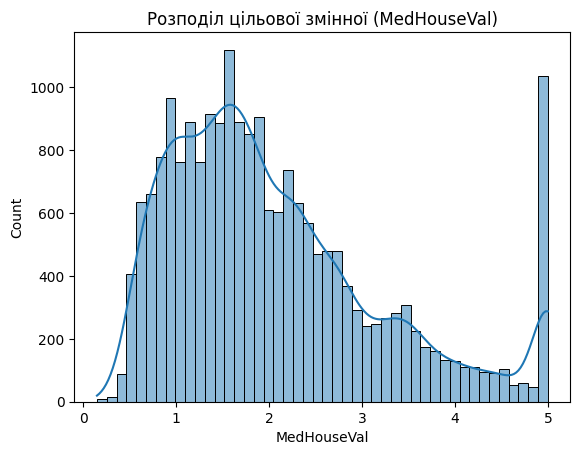

In [ ]:
sns.histplot(california_housing.frame['MedHouseVal'], kde=True)
plt.title('Розподіл цільової змінної (MedHouseVal)')
plt.show()

2. Масштабувати ознаки.

In [ ]:
from sklearn.preprocessing import StandardScaler

# Масштабування ознак
scaler = StandardScaler()
scaled_features = scaler.fit_transform(california_housing.data)

# Створюємо новий DataFrame зі масштабованими ознаками
scaled_df = pd.DataFrame(scaled_features, columns=california_housing.feature_names)


3. Поділити дані на тренувальні і тестові.

In [ ]:
from sklearn.model_selection import train_test_split

# Поділ даних
X_train, X_test, y_train, y_test = train_test_split(scaled_df, california_housing.target, test_size=0.2, random_state=42)


4. Побудувати 3 моделі: лін. Регресія, регресія випадковий ліс, Ridge. Підібрати оптимальні параметри за допомогою GridSeach.

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Моделі
lr = LinearRegression()
ridge = Ridge()
rf = RandomForestRegressor()

# Параметри для підбору
ridge_params = {'alpha': [0.1, 1, 10, 100]}
rf_params = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}

# GridSearch для Ridge
ridge_grid = GridSearchCV(ridge, ridge_params, cv=5, scoring='r2')
ridge_grid.fit(X_train, y_train)

# GridSearch для RandomForest
rf_grid = GridSearchCV(rf, rf_params, cv=5, scoring='r2')
rf_grid.fit(X_train, y_train)

# Навчання лінійної регресії
lr.fit(X_train, y_train)


LinearRegression()

5. Вивести R2      і      MSE. Побудувати графіки.

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error

# Прогнозування
y_pred_lr = lr.predict(X_test)
y_pred_ridge = ridge_grid.predict(X_test)
y_pred_rf = rf_grid.predict(X_test)

# Виведення R² і MSE
print(f"Linear Regression: R²={r2_score(y_test, y_pred_lr):.2f}, MSE={mean_squared_error(y_test, y_pred_lr):.2f}")
print(f"Ridge Regression: R²={r2_score(y_test, y_pred_ridge):.2f}, MSE={mean_squared_error(y_test, y_pred_ridge):.2f}")
print(f"Random Forest: R²={r2_score(y_test, y_pred_rf):.2f}, MSE={mean_squared_error(y_test, y_pred_rf):.2f}")


Linear Regression: R²=0.58, MSE=0.56
Ridge Regression: R²=0.58, MSE=0.56
Random Forest: R²=0.81, MSE=0.26


6. Вивести справжні і прогнозовані значення.


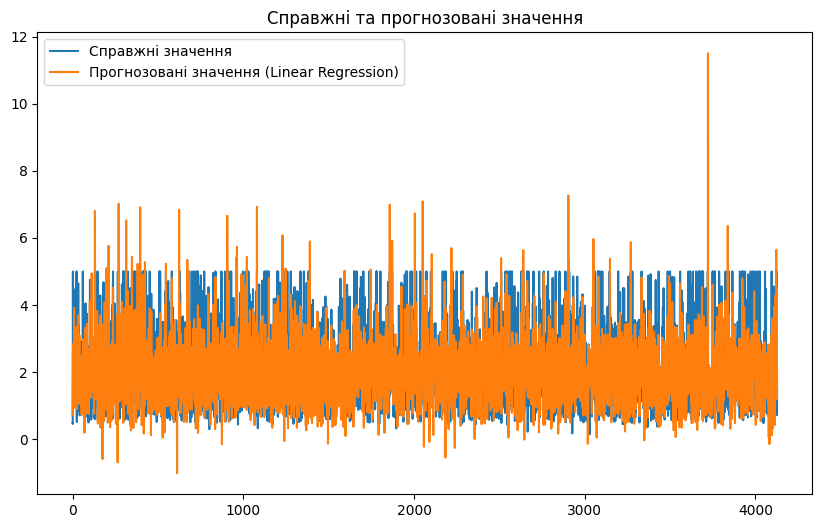

In [ ]:
# Побудова графіку порівняння справжніх і прогнозованих значень для однієї з моделей
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label="Справжні значення")
plt.plot(y_pred_lr, label="Прогнозовані значення (Linear Regression)")
plt.legend()
plt.title('Справжні та прогнозовані значення')
plt.show()

7. Написати ВИСНОВКИ.

Лінійна регресія: Вона показує базовий рівень точності, однак може бути чутливою до мультиколінеарності.
Ridge Regression: Забезпечує краще узагальнення завдяки регуляризації, що зменшує можливість перенавчання.
Random Forest: Показує найкращий результат завдяки здатності моделювати нелінійні залежності.